# Predicting heart disease using ML

this notebook looks into using various python based ml and data science 
libraries in an attempt to build a ml model for out heart disease problem 

Steps to follow :
1. problem definiton 
2. Data 
3. Evaluation 
4. features 
5. modelling 
6. experimentation lots and lots off 

## 1. Problem definition 

> given clinical parameters about a patients can we predict if a patient
has heart disease or not 

## 2. Data
Only 14 attributes used:
      1. #3  (age)       
      2. #4  (sex)       
      3. #9  (cp)        
      4. #10 (trestbps)  
      5. #12 (chol)      
      6. #16 (fbs)       
      7. #19 (restecg)   
      8. #32 (thalach)   
      9. #38 (exang)     
      10. #40 (oldpeak)   
      11. #41 (slope)     
      12. #44 (ca)        
      13. #51 (thal)      
      14. #58 (num)       (the predicted attribute)

## 3. Evaluation
benchmark : 95% accuracy 

## 4. Features 

**Create data dictionary**

1. age: Displays the age of the individual.

2. sex: Displays the gender of the individual using the following format : 1 = male 0 = female

3. cp- Chest-pain type: displays the type of chest-pain experienced by the individual using the following format : 0 = typical angina 1 = atypical angina 2 = non — anginal pain 3 = asymptotic

4. trestbps- Resting Blood Pressure: displays the resting blood pressure value of an individual in mmHg (unit). anything above 130-140 is typically cause for concern.

5. chol- Serum Cholestrol: displays the serum cholesterol in mg/dl (unit)

6. fbs- Fasting Blood Sugar: compares the fasting blood sugar value of an individual with 120mg/dl. If fasting blood sugar > 120mg/dl then : 1 (true) else : 0 (false) '>126' mg/dL signals diabetes

7. restecg- Resting ECG : displays resting electrocardiographic results 0 = normal 1 = having ST-T wave abnormality 2 = left ventricular hyperthrophy

8. thalach- Max heart rate achieved : displays the max heart rate achieved by an individual.

9. exang- Exercise induced angina : 1 = yes 0 = no

10. oldpeak- ST depression induced by exercise relative to rest: displays the value which is an integer or float.

11. slope- Slope of the peak exercise ST segment : 0 = upsloping: better heart rate with excercise (uncommon) 1 = flat: minimal change (typical healthy heart) 2 = downsloping: signs of unhealthy heart

12. ca- Number of major vessels (0–3) colored by flourosopy : displays the value as integer or float.

13. thal : Displays the thalassemia : 1,3 = normal 6 = fixed defect 7 = reversible defect: no proper blood movement when excercising

14. target : Displays whether the individual is suffering from heart disease or not : 1 = yes 0 = no



In [1]:
!pip install seaborn

In [2]:
# preparing the tools 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

# models 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# model evaluation
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import precision_score , recall_score , f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve


**Load DATA**

In [3]:
df = pd.read_csv("heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

## data exploration 

checklist :
1. what questions are we trying to solve ? 
2. what kind of data we have and how do we trear different types 
3. what's  missing from the data and how to deal with it ?
4. how can you add change or remove features to get most out of data 


In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
# how many of each class there are
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

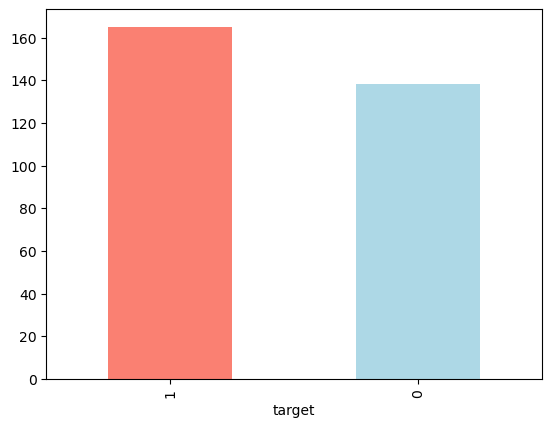

In [8]:
df["target"].value_counts().plot(kind = "bar",color = ["salmon","lightblue"]);

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart disease frequency according to sex

In [12]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [13]:
# compare target column with sex column
pd.crosstab(df.target , df.sex)

sex,0,1
target,,
0,24,114
1,72,93


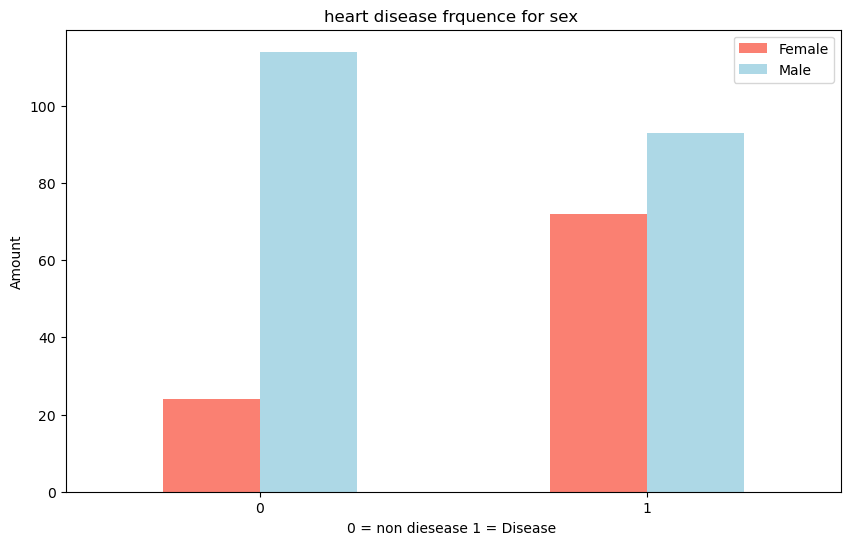

In [14]:
# create a plot of crosstab
pd.crosstab(df.target , df.sex).plot(kind="bar",
                                     figsize = (10,6) , 
                                     color = ["salmon","lightblue"]
                                    )
plt.title("heart disease frquence for sex ")
plt.xlabel("0 = non diesease 1 = Disease ")
plt.ylabel("Amount")
plt.legend(["Female" ,  "Male"]) 
plt.xticks(rotation = 0); 

In [15]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [16]:
df["thalach"].value_counts()

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

### Age vs max heart rate for heart disease 

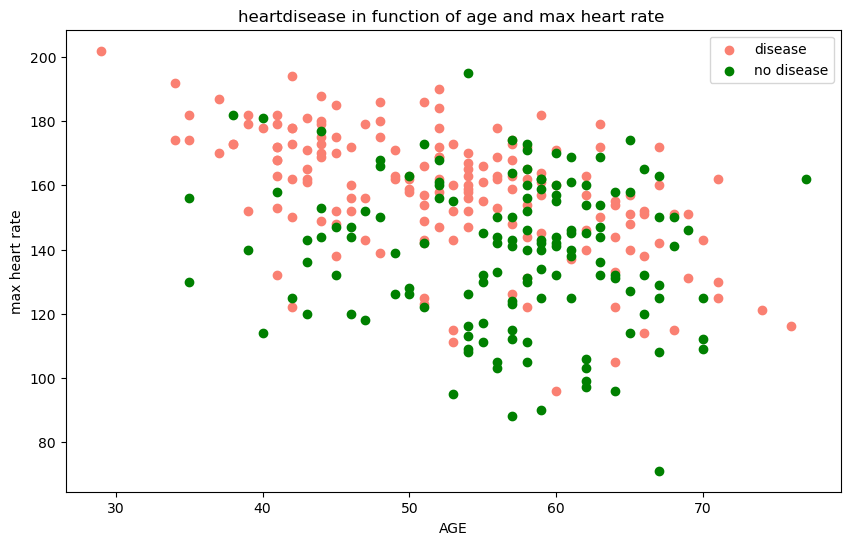

In [17]:
#create another figure 
plt.figure(figsize = (10 , 6))

#scatter with positive examples 
plt.scatter(df.age[df.target == 1] ,
           df.thalach[df.target == 1] ,
            c = "salmon"
           )

# scatter with negative examples 
plt.scatter(df.age[df.target == 0] ,
           df.thalach[df.target == 0] ,
           c = "green" )

# add some helpful info 
plt.title("heartdisease in function of age and max heart rate ")
plt.ylabel("max heart rate")
plt.legend(["disease", "no disease"])
plt.xlabel("AGE");

In [18]:
df.age[df.target ==1]

0      63
1      37
2      41
3      56
4      57
       ..
160    56
161    55
162    41
163    38
164    38
Name: age, Length: 165, dtype: int64

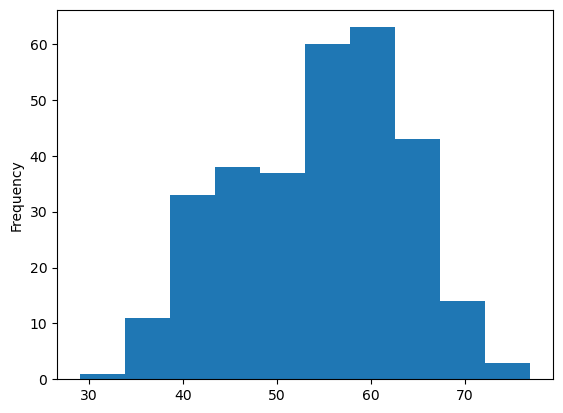

In [19]:
# check the distribution of the age column with a histogram 

df.age.plot.hist();

##   heart disease frequency and its types 

Chest-pain type: displays the type of chest-pain experienced by the individual using the following format 
0 = typical angina 
1 = atypical angina 
2 = non — anginal pain 
3 = asymptotic

In [20]:
pd.crosstab(df.cp , df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


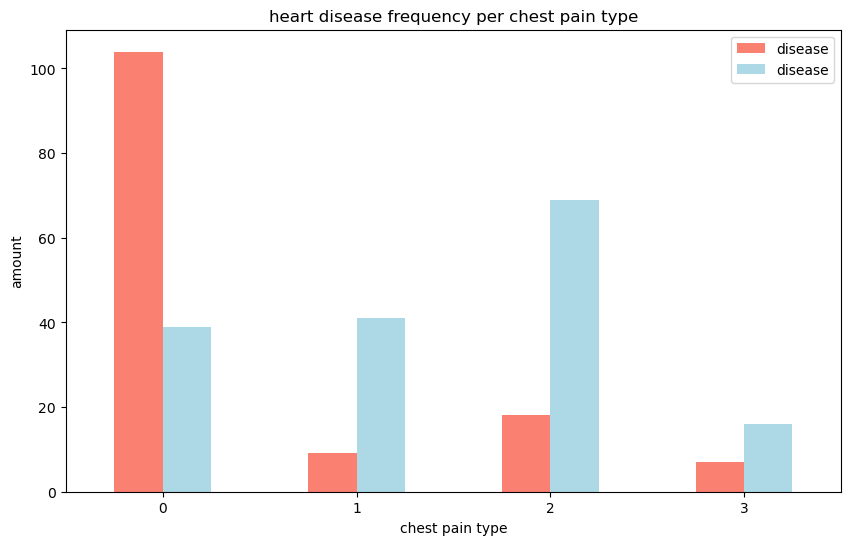

In [21]:
# make the crosstab more visual 
pd.crosstab(df.cp , df.target).plot(kind = "bar" ,
                                   figsize = (10, 6) ,
                                   color = ["salmon" , "lightblue"] , 
                                   )
plt.title("heart disease frequency per chest pain type")
plt.ylabel("amount")
plt.xlabel("chest pain type")                                    
plt.legend(["disease","disease"])
plt.xticks(rotation = 1) ;


In [22]:
#Building a coorelation matrix 

df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


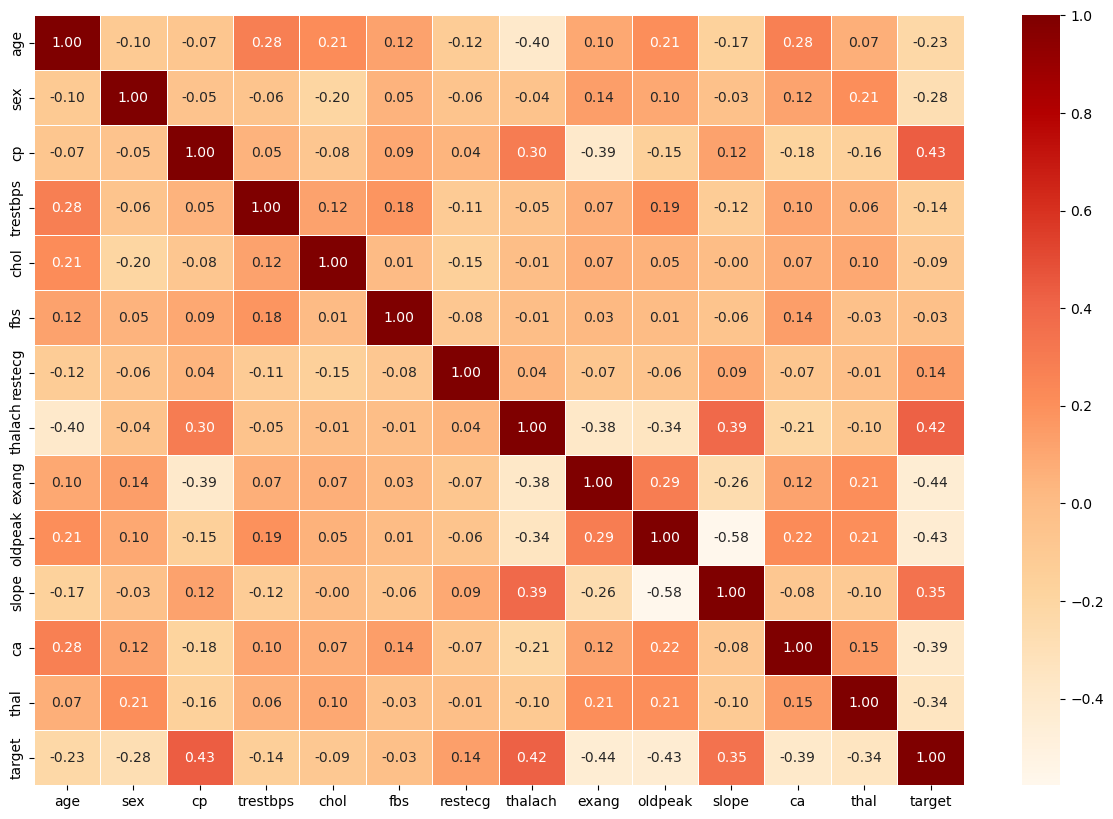

In [23]:
# lets make out coorelation matrx a bit prettier 

corr_matrix = df.corr()
fig , ax = plt.subplots(figsize = (15 , 10))
ax = sns.heatmap(corr_matrix ,
                annot = True ,
                linewidths = 0.5 ,
                fmt = ".2f" ,
                cmap ="OrRd" ) ;

 ## 5. Modelling

In [24]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [25]:
# split data into X and y 
X = df.drop("target" , axis = 1)
y = df["target"]

In [26]:
# split data into train and test sets 
np.random.seed(42)

# spint by train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2)

**1. now we got our data split to training and test sets its time to build a ml
model.**

**2. we will train it.**
**3. then we will test it using the pattens it found using the test set**

we are going to try 3 different machine learning problems :

1. Logistic regression
2. K-nearest
3. randomforest classifier

In [27]:
#put models in a dictonary 
models = { "Logistic Regression" : LogisticRegression() ,
          "KNN" : KNeighborsClassifier() ,
          "Random Forest" : RandomForestClassifier() }

# create a function to fit and score models 

def fit_and_score(models , X_train , X_test, y_train , y_test) :
    # set up random seed
    np.random.seed(42)
    # make a dictionary to keep model scores
    model_scores = {}
    #loop through models
    for name , model in models.items():
        # fit the model to the data
        model.fit(X_train , y_train)
        # evaluate the model amd append its score to model scores
        model_scores[name] = model.score(X_test , y_test)
    return model_scores
    

In [28]:
model_scores = fit_and_score(models = models , 
                            X_train = X_train ,
                             X_test = X_test,
                            y_train = y_train ,
                            y_test = y_test  
                            )

model_scores



C:\Users\Ayush Aryan\Desktop\heart_disease_project1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## model comparison

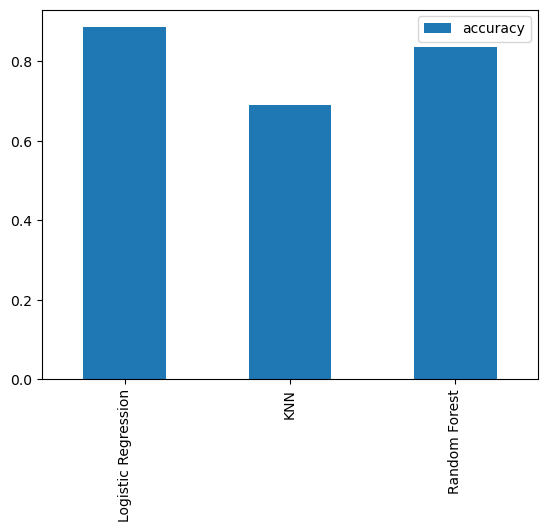

In [29]:
model_compare = pd.DataFrame(model_scores , index = ["accuracy"] )
model_compare.T.plot.bar() ;

Now we have got a baseline model and we know the models first predictions 
are not always the final ones . now what should we do ?

steps :
* Hyperparameter tuning
* feature importance 
* confusion matrix
* cross validation 
* precision
* recall
* f1 score
* classification report 
* ROC curve 
* area under the curve

## Hyperparameter tuning

In [30]:
# lets tune KNN
train_scores = []
test_scores = []

# create list for different values of n_neighbors
neighbors = range(1,21)

# setup KNN instance
knn =KNeighborsClassifier()

# loop through different n_neighbors
for i in neighbors :
    knn.set_params(n_neighbors = i )
    
    #fit the algorithm 
    knn.fit(X_train , y_train)
    
    # update the training scores list
    train_scores.append(knn.score(X_train , y_train))
    
    #update the  test scores list
    test_scores.append(knn.score(X_test , y_test) )

In [31]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [32]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data : 75.409836%


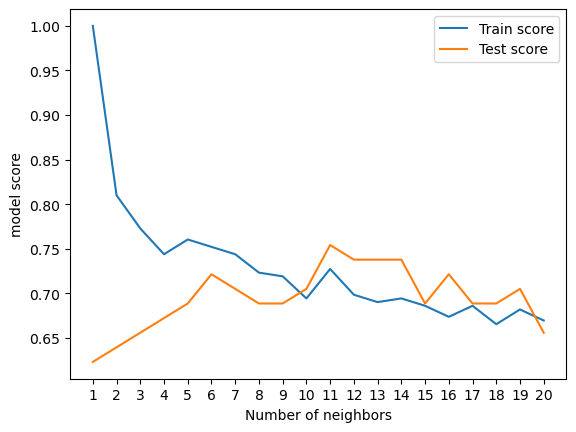

In [33]:
plt.plot(neighbors , train_scores , label = "Train score")
plt.plot(neighbors , test_scores , label = "Test score")
plt.xlabel("Number of neighbors")
plt.xticks(np.arange(1,21,1))
plt.ylabel("model score")
plt.legend()

print(f"Maximum KNN score on the test data : {max(test_scores)*100:2f}%")

## Hyperparameter tuning with RandomizedSearchCV

We are going to tune:
* LogisticRegression( )
* RandomForestClassifier ( ) 
* using the RandomizedSearchCV

In [34]:
# Create a hyperparameter grid for logistic regression
log_reg_grid = {"C" : np.logspace(-4 , 4 , 20) ,
               "solver" : ["liblinear"]
               }

# create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators" : np.arange(10 , 1000 , 50) ,
           "max_depth" : [None ,  3, 5, 10] ,
           "min_samples_split" : np.arange(2,20,2) ,
           "min_samples_leaf" : np.arange(1,20,2)
          }

Tuning them using RandomizedSearchCV

In [35]:
# tuning LogisticRegression

np.random.seed(42)

# setup random hyperparmeter search for logisticregression
rs_log_reg = RandomizedSearchCV(LogisticRegression() ,
                               param_distributions = log_reg_grid ,
                               cv = 5,
                               n_iter = 20 ,
                               verbose = True)

# fit random hyperparameter search model for Logistic Regression
rs_log_reg.fit(X_train , y_train )

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [36]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [37]:
rs_log_reg.score(X_test , y_test)

0.8852459016393442

tuning random forest classifier .
logistic regression tuning was not that successful 

In [38]:
# setup random seed
np.random.seed(42)

# setup random hyperparameter
rs_rf = RandomizedSearchCV(RandomForestClassifier() ,
                          param_distributions=rf_grid ,
                          cv = 5, 
                          n_iter= 20 ,
                          verbose = True)

# fit the hyperparameters search model for RandomForestCalssifier()
rs_rf.fit(X_train , y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [39]:
# find the best prameters 
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [40]:
# evaluate this ramdomized search RandomForewstClassifier model
rs_rf.score(X_test , y_test)

0.8688524590163934

In [41]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

the three mothods :
1. By hand 
2. RandomizedSearchCV
3. GridSearchCV

## Tuning hyperparameters of logistic regression model using grid search cv

Since our logisticregression model provides thee best results by now 
so we try to improve it by GRidSearchCV

In [42]:
# Different paremters to tune for our LogisticRegression model 
log_reg_grid = {"C" : np.logspace(-4 , 4, 30) ,
               "solver" : ["liblinear"]}

# setup grid searchcv hyperparameters search for logistic regression
gs_log_reg = GridSearchCV(LogisticRegression() ,
                         param_grid = log_reg_grid ,
                         cv =5 ,
                         verbose = True)

# fit the grid hyperparmeter search model
gs_log_reg.fit(X_train , y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [43]:
#check the best hyperparameters 
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [44]:
# evaluate grid seaerch logistic regression model 
gs_log_reg.score(X_test , y_test)

0.8852459016393442

In [45]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Evaluating our tuned ml classifier , beyond accuracy :

* ROC curve and AUC score
* Confusion matrix
* Classification report
* presicion 
* recall
* F1

to make comparisons and evaluate our model we need to make predictions 

In [46]:
# make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [47]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [48]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

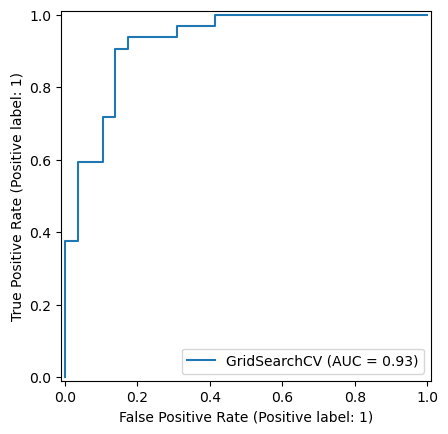

In [49]:
from sklearn.metrics import RocCurveDisplay 

# from_estimator() = use a model to plot ROC curve on data
RocCurveDisplay.from_estimator(estimator=gs_log_reg, 
                               X=X_test, 
                               y=y_test); 

In [50]:
# confusion matrix 
print(confusion_matrix(y_test , y_preds))

[[25  4]
 [ 3 29]]


In [51]:
sns

<module 'seaborn' from 'C:\\Users\\Ayush Aryan\\Desktop\\heart_disease_project1\\env\\Lib\\site-packages\\seaborn\\__init__.py'>

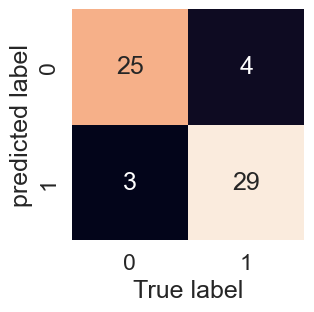

In [52]:
sns.set(font_scale = 1.5)

def plot_conf_mat(y_test , y_preds):
    fig , ax = plt.subplots(figsize =(3,3))
    ax = sns.heatmap(confusion_matrix(y_test , y_preds) ,
                    annot = True ,
                    cbar = False)
    plt.xlabel("True label")
    plt.ylabel("predicted label")

plot_conf_mat(y_test , y_preds)

lets get a classification report as well as cross
validated recall precision and f1 score 

In [53]:
print(classification_report(y_test , y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using cross validation 

we are going to calculate precision recall and f1 scores of our model using cross validation and to do so we ll be using 'cross_val_score()'


In [54]:
# check best hyperparameters
gs_log_reg.best_params_


{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [55]:
# create a new classifier with best parameters 
clf = LogisticRegression(C = 0.20433597178569418 ,
                        solver = "liblinear")

In [61]:
# cross - validated accuracy
cv_acc = cross_val_score(clf ,
                        X ,
                        y,
                        cv=5,
                        scoring = "accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [65]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [66]:
# cross-validated precision

cv_precision = cross_val_score(clf ,
                        X ,
                        y,
                        cv=5,
                        scoring = "precision")
cv_precision= np.mean(cv_precision)
cv_precision


0.8207936507936507

In [67]:
# cross-validated recall
cv_recall = cross_val_score(clf ,
                        X ,
                        y,
                        cv=5,
                        scoring = "recall")
cv_recall= np.mean(cv_recall)
cv_recall

0.9212121212121213

In [69]:
# crossvalidated f1 score

cv_f1 = cross_val_score(clf ,
                        X ,
                        y,
                        cv=5,
                        scoring = "f1")
cv_f1= np.mean(cv_f1)
cv_f1

0.8673007976269721

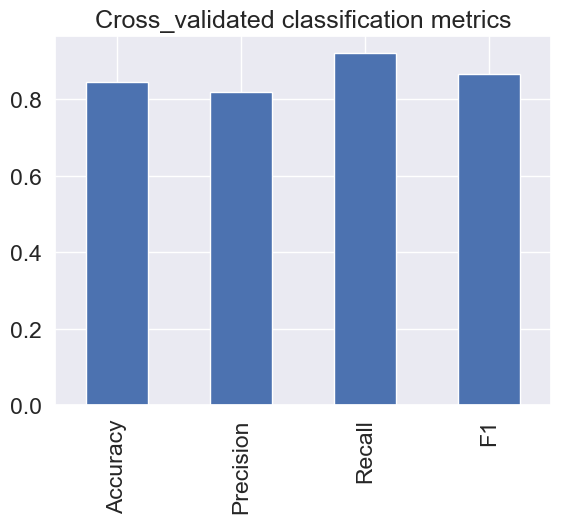

In [71]:
# visulaize cross validated metrics
cv_metrics = pd.DataFrame({"Accuracy" : cv_acc ,
                          "Precision" : cv_precision ,
                          "Recall" : cv_recall ,
                          "F1" : cv_f1} ,
                         index = [0])

cv_metrics.T.plot.bar(title = "Cross_validated classification metrics",
                     legend =False);

### Feature Importance 

feature importance is another way of asking which features contributed most to the outcomess 
of the model and how did they contribute ?

finding feature importance is different for each ml model . One way to find
feature importance is to search for  *(Model Name) feature importance . 

Lets find the feature importance of our logistic regression model .. 

In [76]:
# Fit an instance of Logistic regression 
gs_log_reg.best_params_

clf = LogisticRegression(C = 0.20433597178569418 ,
                        solver = "liblinear")

clf.fit(X_train , y_train);

In [79]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [78]:
# check coef_
clf.coef_

array([[ 0.00316728, -0.86044652,  0.6606704 , -0.01156993, -0.00166375,
         0.04386107,  0.31275848,  0.02459362, -0.60413081, -0.56862803,
         0.45051628, -0.63609898, -0.67663373]])

In [80]:
# match the features to columns 
feature_dict  = dict(zip(df.columns , list(clf.coef_[0])))
feature_dict

{'age': 0.0031672806268220445,
 'sex': -0.8604465226286001,
 'cp': 0.6606703996492814,
 'trestbps': -0.011569930743501303,
 'chol': -0.001663745833540806,
 'fbs': 0.043861067871676124,
 'restecg': 0.3127584791782968,
 'thalach': 0.02459361509185037,
 'exang': -0.6041308102637141,
 'oldpeak': -0.5686280255489925,
 'slope': 0.4505162810238786,
 'ca': -0.6360989756865822,
 'thal': -0.67663372723561}

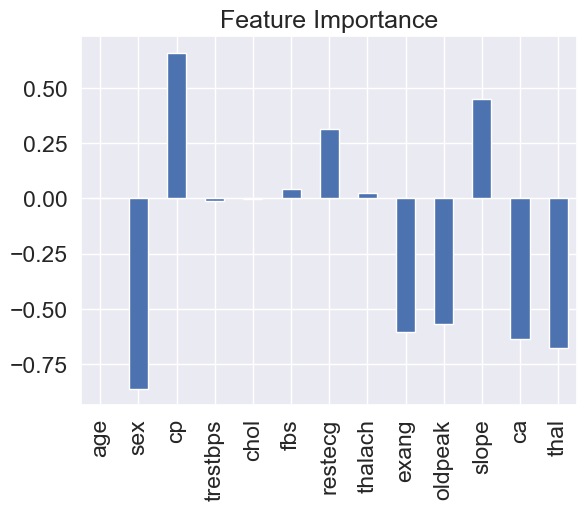

In [82]:
# visualise feature importance 
feature_df = pd.DataFrame(feature_dict , index = [0])
feature_df.T.plot.bar(title = "Feature Importance" , legend = False) ;

In [83]:
pd.crosstab(df["sex"] , df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [84]:
pd.crosstab(df["slope"] , df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


## 6. Experimentation

if you havnt hit your evaluation matrix ask yourself :
* could you collect more data ?
* Could you tay a better model? CatBoost of XGboost
* could we ipmorve the current models ?

In [ ]:
###